#Arbol de desición con dataset banco


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
from sklearn.metrics import accuracy_score              #clase para generar la exactitud del modelo (accuracy)
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/DeepLearning/main/Datasets/mercadeo_bancario.csv")
df.head()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


In [ ]:
valores_trabajo = {'trabajo':{'blue-collar':1, 'technician':2, 'management':3, 'services':4, 'retired':5,
       'admin.':6, 'housemaid':7, 'unemployed':8, 'entrepreneur':9,
       'self-employed':10, 'unknown':11, 'student':12 }}

valores_estado_civil = {'estado_civil ':{'married':1, 'single':2, 'divorced':3, 'unknown':4}}

valores_educacion = {'educacion':{'preschool':1, 'unknown':2, 'university.degree':3,
       'Technological_school':4, 'tecnical_school':5, 'professional.course':6,
       'primary_school':7, 'illiterate':8}}   

valores_credito_sin_pago = {'credito_sin_pago':{'unknown':0, 'no':1, 'yes':2}} 

valores_prestamo_vivienda = {'prestamo_vivienda':{'yes':2, 'no':1, 'unknown':0}}          

valores_prestamo_personal = {'prestamo_personal':{'yes':2, 'no':1, 'unknown':0}}  

valores_contacto = {'contacto':{'cellular':0, 'telephone':1}}

valores_mes = {'mes':{'aug':8, 'nov':11, 'jun':6, 'apr':4, 'jul':6, 'may':5, 'oct':10, 'mar':3, 'sep':9,
       'dec':12}}

valores_dia_semana = {'dia_semana':{'thu':4, 'fri':5, 'tue':2, 'mon':1, 'wed':3}}     

In [ ]:
df.replace(valores_trabajo,inplace=True)
df.replace(valores_estado_civil,inplace=True)
df.replace(valores_educacion,inplace=True)
df.replace(valores_credito_sin_pago,inplace=True)
df.replace(valores_prestamo_vivienda,inplace=True)
df.replace(valores_prestamo_personal,inplace=True)
df.replace(valores_contacto,inplace=True)
df.replace(valores_mes,inplace=True)
df.replace(valores_dia_semana,inplace=True)

df

In [ ]:
df.dtypes

edad                        int64
trabajo                     int64
estado_civil                int64
educacion                   int64
total_hijos                 int64
credito_sin_pago            int64
prestamo_vivienda           int64
prestamo_personal           int64
valor_prestamo              int64
dias_ultimo_pago            int64
tarjetas_credito            int64
contacto                    int64
mes                         int64
dia_semana                  int64
duracion_ultimo_contacto    int64
dias_ultimo_contacto        int64
anterior_contacto           int64
numero_empleados            int64
si_no                       int64
dtype: object

Nulos a 0

In [ ]:
df.isna().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

##Arbol y entrenamiento

Instanciamos el arbol

In [ ]:
arbol = DecisionTreeClassifier()

Dividimos los datos(Train y test)

In [ ]:
X = df.drop('si_no', axis=1)#Todos los datos menos si_no
y = df.si_no
#cambiamos la proporción de 70%-train y 30%-test
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3, random_state=42)


Entrenamos

In [ ]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Graficamos para ver la profundidad


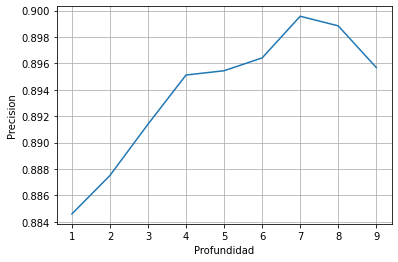

In [ ]:
max_depth_lista = list(range(1, 10))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, y_train)
    score = arbol_clasi.score(X_test, y_test)
    accuracy.append(score)

# Graficamos los resultados 

plt.plot(max_depth_lista,accuracy)
plt.ylabel('Precision')
plt.xlabel('Profundidad')
plt.grid(True)
plt.show()

###Hiper-parametros que ayudan a mejorar la creación de un árbol
*   max_depth: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
*   min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
*   min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
*   max_leaf_nodes: número máximo de nodos finales

In [ ]:
arbol_clasi = DecisionTreeClassifier(max_depth = 7, random_state = 0)

arbol_clasi.fit(X_train, y_train)

accuary = arbol_clasi.score(X_test, y_test)
print("Precision: "+str(accuary*100)+" %")

Precision: 89.9571093307437 %


Predicciones

In [ ]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = arbol.predict(X_train)
# Predecimos sobre nuestro set de test
y_test_pred = arbol.predict(X_test)
# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))
accuary_global = arbol.score(X_test, y_test)
#Cuando el error de entrenamiento es mayor al del test es porque hay overfitting ( significa tener en cuenta demasiada información de sus datos y / o conocimientos previos)

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.8701141053653799


Observamos las llaves 

In [ ]:
X.keys()

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'],
      dtype='object')

Generando el arbol

In [ ]:
#Instanciamos la lista de valores que toma el arbol
class_names_list=list(['edad','trabajo','estado_civil ','educacion','total_hijos',
                       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
                       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
                       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
                       'anterior_contacto', 'numero_empleados'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(arbol,feature_names=class_names_list, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_1.png')
#Lieral me dice que es gigante y que lo escalo a 0.260647 para que quedara todo en la imagen :(

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.27713 to fit



True